 # Python-Powered Hospital Data Insights

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, date
import warnings
warnings.filterwarnings("ignore")



### Reading the Patients sheet

In [4]:
df_pa=pd.read_excel(r'C:\Users\kavar\OneDrive\Desktop\SQL_Hackathon_aug_22\HospitalDB_Doc\Hospital Data\QualityDataset.xlsx','Patients')
df_pa.head()

,PatientMRN,FirstName,LastName,DateOfBirth,Gender,Race,Language
0,1,NaN,NaN,1960-01-01 00:00:00.000,Male,White,English
1,2,NaN,NaN,1985-11-15 02:08:42.090,Male,White,English
2,3,NaN,NaN,1976-04-15 02:52:09.762,Male,White,English
3,4,NaN,NaN,1968-10-15 03:32:13.635,Male,White,English
4,5,NaN,NaN,1962-05-01 19:12:58.950,Male,White,English


### Reading the EDVisits sheet

In [6]:
df_ED=pd.read_excel(r'C:\Users\kavar\OneDrive\Desktop\SQL_Hackathon_aug_22\HospitalDB_Doc\Hospital Data\QualityDataset.xlsx','EDVisits')
df_ED.head()

,EDVisitID,PatientMRN,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted


### Reading the AmbulatoryVisits sheet

In [7]:
df_amb=pd.read_excel(r'C:\Users\kavar\OneDrive\Desktop\SQL_Hackathon_aug_22\HospitalDB_Doc\Hospital Data\QualityDataset.xlsx','AmbulatoryVisits')
df_amb.head()

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
0,202,840,29,2019-03-19,2019-03-13 07:59:24.044,10,Physical,NaN,NaN,NaN,No Show
1,436,820,25,2019-03-19,2019-02-24 07:10:31.043,3,Follow Up,NaN,NaN,NaN,No Show
2,794,879,30,2019-04-02,2019-03-19 01:41:55.656,11,Telemedicine,NaN,NaN,NaN,No Show
3,799,884,37,2019-03-03,2019-02-25 01:25:39.696,4,Telemedicine,NaN,NaN,NaN,No Show
4,515,32,26,2019-03-16,2019-02-20 06:44:59.617,11,Telemedicine,NaN,NaN,NaN,No Show


### Reading the ReAdmissionRegistry sheet

In [10]:
df_re=pd.read_excel(r'C:\Users\kavar\OneDrive\Desktop\SQL_Hackathon_aug_22\HospitalDB_Doc\Hospital Data\ReadmissionRegistryExcel.xlsx','ReadmissionRegistry')
df_re.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag
0,355,10,2018-01-01,2018-01-07 20:50:16.780,Transfer,ICU,Stroke,14.787084,0.106645,1.0,5.0,1.0
1,357,54,2018-01-03,2018-01-19 11:17:38.763,Transfer,Neurology,Stroke,10.424714,0.536581,1.0,5.0,1.0
2,20,243,2018-01-20,2018-01-23 03:03:40.672,Transfer,General Medicine,Stroke,5.080003,0.195057,1.0,5.0,1.0
3,21,265,2018-01-21,2018-02-05 11:33:38.318,Transfer,General Medicine,Stroke,7.158905,0.454725,1.0,5.0,1.0
4,22,277,2018-01-22,2018-02-06 06:51:07.293,Transfer,General Medicine,Stroke,10.206560,0.182587,1.0,5.0,1.0


### Reading the Discharges sheet

In [11]:
df_dis=pd.read_excel(r'C:\Users\kavar\OneDrive\Desktop\SQL_Hackathon_aug_22\HospitalDB_Doc\Hospital Data\QualityDataset.xlsx','Discharges')
df_dis.head()

,AdmissionID,PatientID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality
0,1,9,2018-01-01,2018-01-07 18:06:06.408,Expired,Cardiology,AMI,9.646857,0.061540
1,257,93,2018-01-06,2018-01-18 02:59:04.667,Expired,Cardiology,Broken Leg,6.816558,0.628827
2,152,101,2018-01-07,2018-01-11 16:16:06.782,Expired,Cardiology,Kidney Failure,6.580273,0.573887
3,361,102,2018-01-07,2018-01-15 04:48:33.134,Expired,Cardiology,Afib,12.794536,0.222163
4,258,103,2018-01-07,2018-01-15 13:32:36.157,Expired,Cardiology,Broken Leg,2.639297,0.055468


### Reading the Providers sheet

In [13]:
df_pro=pd.read_excel(r'C:\Users\kavar\OneDrive\Desktop\SQL_Hackathon_aug_22\HospitalDB_Doc\Hospital Data\QualityDataset.xlsx','Providers')
df_pro.head()

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
0,1,Sally Sue,Pediatrics,1993-01-01 00:00:00.000
1,2,Mike Myers,Pediatrics,1993-05-02 00:00:17.695
2,3,Jordan Michael,Pediatrics,1993-06-24 21:31:46.687
3,4,Ted Texas,Pediatrics,1993-12-23 21:33:52.299
4,5,Ala Bama,Pediatrics,1995-01-10 02:53:47.838


### Reading the EDUnique sheet

In [16]:
df_EDU=pd.read_excel(r'C:\Users\kavar\OneDrive\Desktop\SQL_Hackathon_aug_22\HospitalDB_Doc\Hospital Data\QualityDataset.xlsx','EDVisits')
df_EDU.head()

,EDVisitID,PatientMRN,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted


### 1.Make a pair plot on Readmission Registry table & do u see any correlation between columns values.

In [ ]:
df_readmin =df_re.copy()
df_readmin.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype          
---  ------                     --------------  -----          
 0   AdmissionID                720 non-null    int64          
 1   PatientID                  720 non-null    int64          
 2   AdmissionDate              720 non-null    object         
 3   DischargeDate              720 non-null    object         
 4   Service                    720 non-null    object         
 5   PrimaryDiagnosis           720 non-null    object         
 6   ExpectedLOS                720 non-null    float64        
 7   ExpectedMortality          720 non-null    float64        
 8   ReadmissionFlag            194 non-null    float64        
 9   DaysToReadmission          194 non-null    float64        
 10  EDVisitAfterDischargeFlag  341 non-null    float64        
 11  LOS                        720 non-null    timedelta64[ns]

In [ ]:
df_readmin[['PatientID']] = df_readmin[['PatientID']].astype('string')
df_readmin[['AdmissionID']]=df_readmin[['AdmissionID']].astype('string')
df_readmin[['EDVisitAfterDischargeFlag']]=df_readmin[['EDVisitAfterDischargeFlag']].astype('string')
df_readmin[['ReadmissionFlag']]=df_readmin[['ReadmissionFlag']].astype('string')


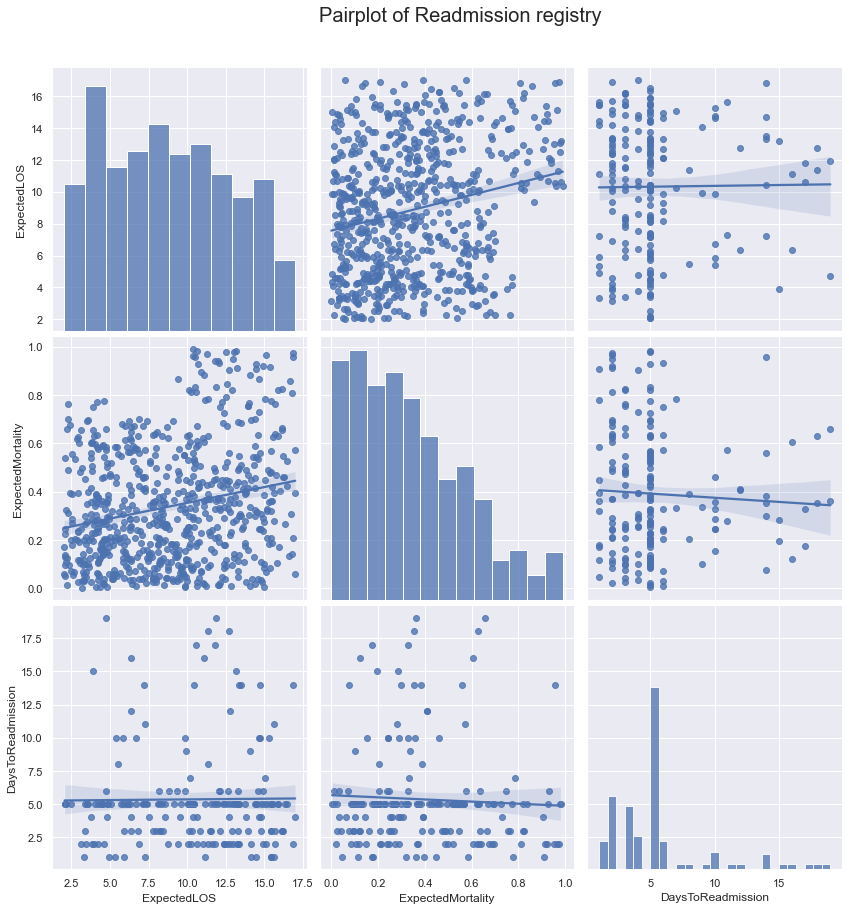

In [ ]:
sns.pairplot(df_readmin,height = 4,palette = 'CMRmap',kind="reg")
plt.title('Pairplot of Readmission registry',y=3.2,x=-0.5,fontsize=20)
plt.show()


#### There are no highly correlated columns. There is a moderately low correlation between ExpectedLOS and Expected Mortality.


### 2.Using iloc, retrieve the firstname and lastname of patients between indices 101 and 200.

In [ ]:
df_pa.iloc[101:201,1:3]

,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


### 3."Create a figure object called fig using plt.figure() **
### ** Use add_axes to add an axis to the figure canvas at [0,0,1,1]. Call this new axis ax. **
### ** Plot (x,y) on that axes and set the labels.
### Note : You can plot on any x,y set of values.

Text(0.5, 1.0, 'Figure Plot')

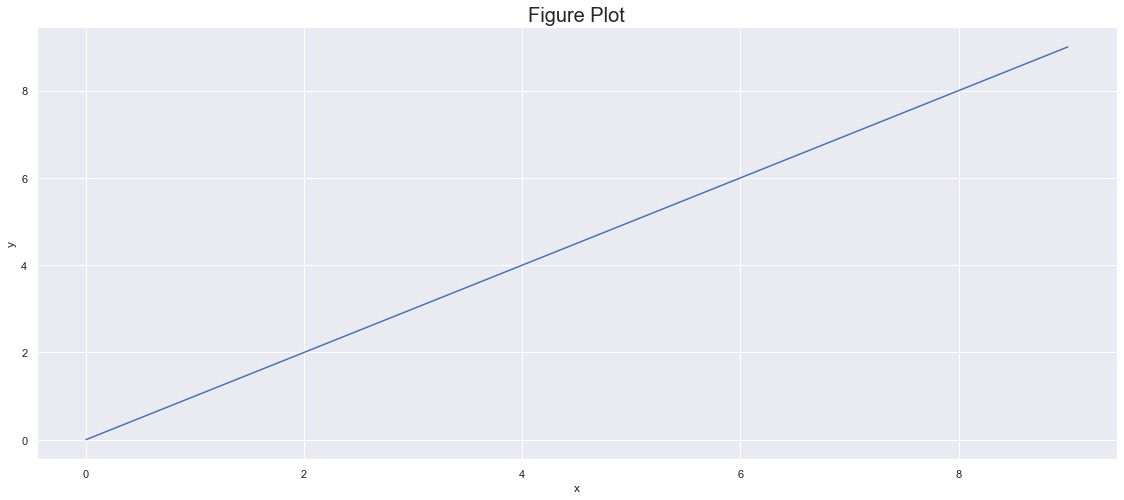

In [ ]:
sns.set(style="darkgrid")
x=range(0,10)
y=range(0,10)
fig = plt.figure(figsize=(15,6))
ax = fig.add_axes([0,0,1,1])
ax.plot(x,y)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title("Figure Plot",fontsize=20)


### 4.Display data by splitting age in 4 quartiles and labeling the quartiles.

In [ ]:
df_pa['Converted_dob']=df_pa['DateOfBirth'].dt.strftime("%d/%m/%Y")
def age(born):
    born = datetime.strptime(born, "%d/%m/%Y").date()
    today = date.today()
    return today.year - born.year - ((today.month, 
                                      today.day) < (born.month, 
                                                    born.day))
df_pa['Age'] = df_pa['Converted_dob'].apply(age)

Quartile_Age =df_pa['Age'].quantile([ 0.25,  0.5, 0.75,1])
index_Label = (['1st Quantile','2nd Quantile','3rd Quantile','4th Quantile']) 
Quartile_Age.index =index_Label
Quartile_Age




1st Quantile    42.0
2nd Quantile    48.0
3rd Quantile    56.0
4th Quantile    62.0
Name: Age, dtype: float64

### 5.Display full name of patients who are born in 1986.

In [ ]:
data_1986 = df_pa[pd.DatetimeIndex(df_pa.DateOfBirth).year==1986]
data_1986['FullName']=data_1986['FirstName']+ '' + data_1986['LastName']
data_1986['FullName']

23         Gabriel Joseph
24         Lincoln Brenda
29             AlaHalpert
72            LolitaDarci
164         FadelBernardt
238         BentleyKippax
367            ValeOlanda
373          BrittDureden
386       CristabelChatel
415       ConstantiaGroup
452       MorganScrowston
561             DomBaglow
568        IgnazioMelling
595         HomenickRings
639           HashimSlark
643       EllieRamsbotham
674        LlewellynGroup
714             NilesShaw
733             YvetteInc
777          SiouxieGroup
852            CarlyGroup
868        WorthPickering
877           ArniBaldack
909       KuvalisCoupland
922    RebbeccaRollingson
940            WatFideler
Name: FullName, dtype: object

### 6.Create a jointplot on expected mortality & expected length of stay.

Text(0.5, 1.0, 'Jointplot on expected mortality & expected length of stay')

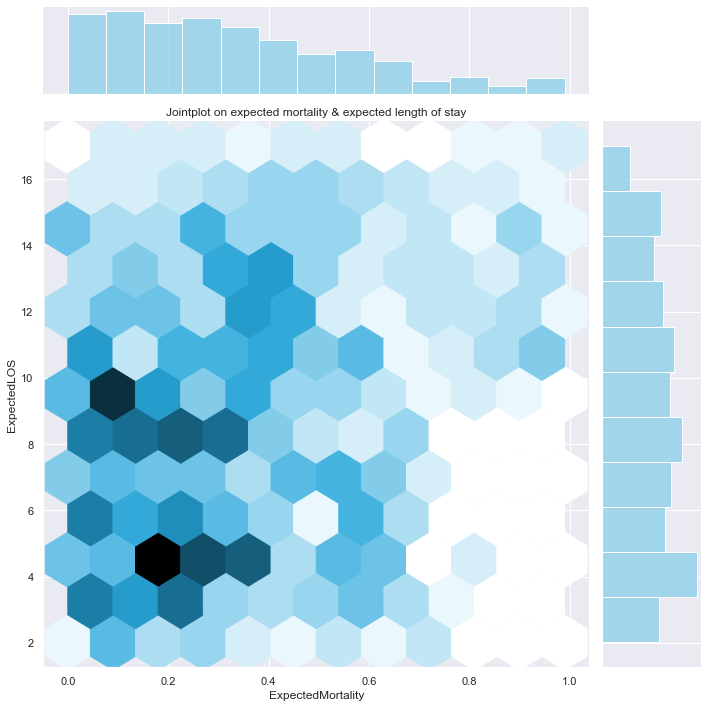

In [ ]:

sns.set(style="darkgrid")
sns.jointplot(data=df_dis, x="ExpectedMortality", y="ExpectedLOS",kind='hex',color='skyblue',height=10)
plt.title("Jointplot on expected mortality & expected length of stay")

### 7.Create a pair plot on whole dataframe by taking parameter "hue" as EDDisposition.

<Figure size 1080x432 with 0 Axes>

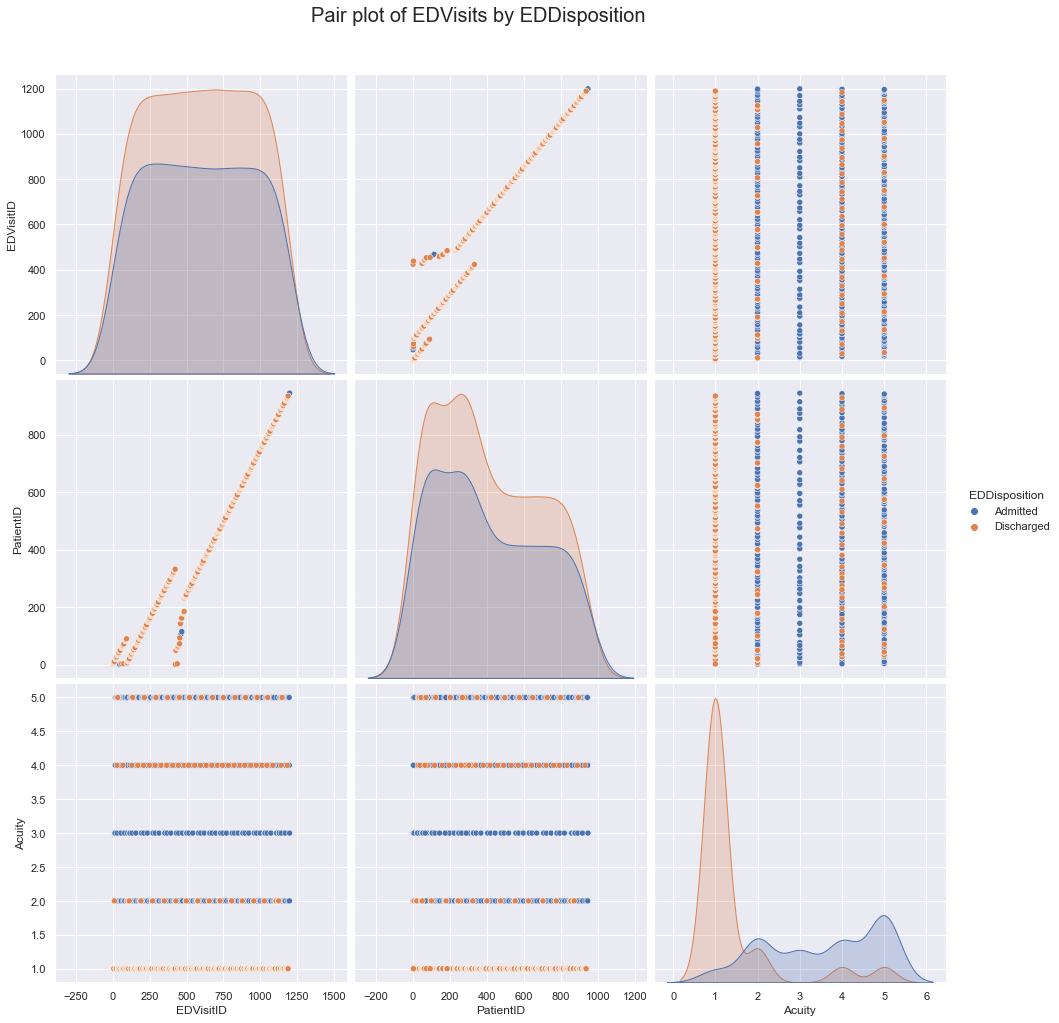

In [ ]:
plt.figure(figsize=(15,6))

sns.pairplot(df_ED, hue='EDDisposition',height=4.5)
plt.title("Pair plot of EDVisits by EDDisposition",y=3.2,x=-0.6,fontsize=20)
plt.show()

### 8.Create a bar chart between expectedLOS & Primary diagnosis.

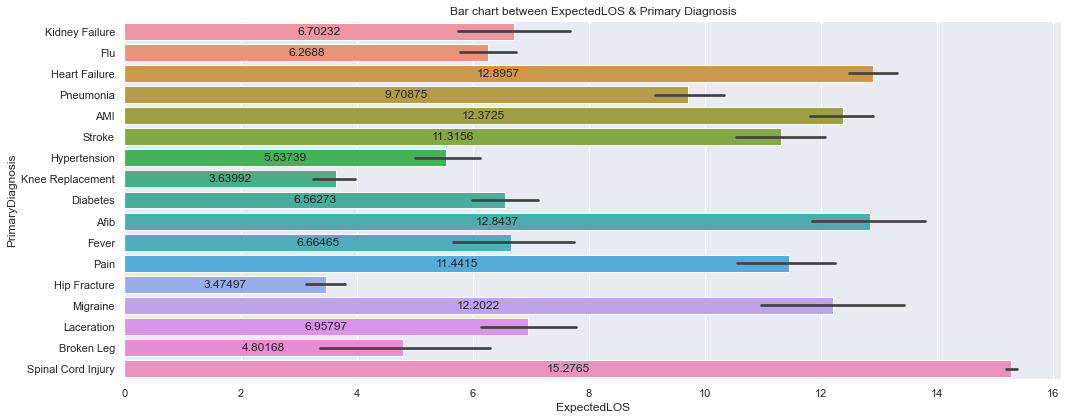

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(x='ExpectedLOS',y='PrimaryDiagnosis',data=df_re)
ax.bar_label(ax.containers[0], label_type='center')
plt.title("Bar chart between ExpectedLOS & Primary Diagnosis")
plt.show()


### 9.Get the list of patient ID's which are not there in ReadmissionRegistry.

In [ ]:
dpatientid = df_pa['PatientID']
readmissionid =df_re['PatientID'].drop_duplicates()
# Patient id not readmitted
Patinentid_nt = dpatientid[~dpatientid.isin(readmissionid)].dropna()
y=Patinentid_nt.tolist()
print(y,end= " ")


[4, 135, 145, 189, 200, 224, 234, 374, 378, 379, 380, 381, 382, 383, 384, 385, 386, 387, 388, 389, 390, 391, 392, 393, 394, 395, 396, 397, 398, 399, 414, 501, 562, 599, 690, 691, 704, 726, 743, 744, 745, 746, 747, 748, 749, 750, 751, 752, 753, 754, 755, 756, 757, 758, 759, 760, 761, 762, 763, 764, 765, 766, 767, 768, 769, 770, 771, 772, 773, 774, 775, 776, 777, 778, 779, 780, 781, 782, 783, 784, 785, 786, 787, 788, 789, 790, 791, 792, 793, 794, 795, 796, 797, 798, 799, 800, 801, 802, 803, 804, 805, 806, 807, 808, 809, 810, 811, 812, 813, 814, 815, 816, 817, 818, 819, 820, 821, 822, 823, 824, 825, 826, 827, 828, 829, 830, 831, 832, 833, 834, 835, 836, 837, 838, 839, 840, 841, 842, 843, 844, 845, 846, 847, 848, 849, 850, 851, 852, 853, 854, 855, 856, 857, 858, 859, 860, 861, 862, 863, 864, 865, 866, 867, 868, 869, 870, 871, 872, 873, 874, 875, 876, 877, 878, 879, 880, 881, 882, 883, 884, 885, 886, 887, 888, 889, 890, 891, 892, 893, 894, 895, 896, 897, 898, 899, 900, 901, 902, 903, 904, 9

### 10.Create a boxplot on ExpectedLOS by taking service into account.

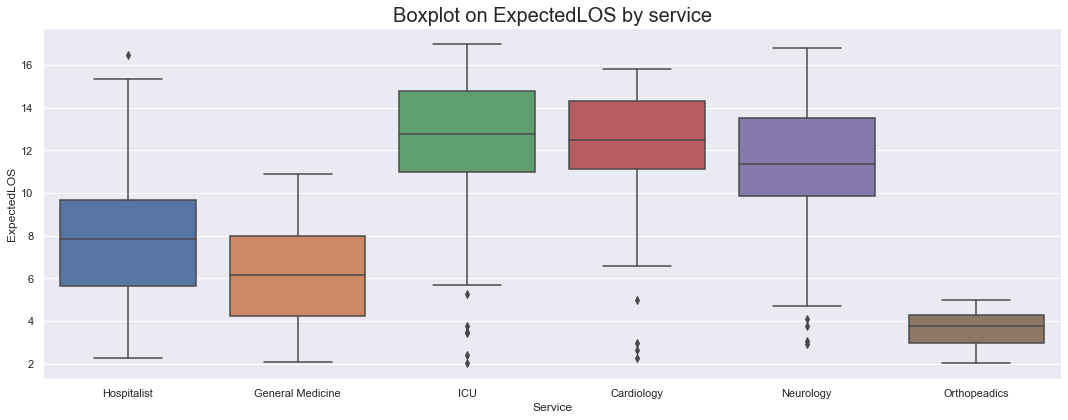

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(y='ExpectedLOS',x='Service',data=df_re)
plt.title("Boxplot on ExpectedLOS by service",fontsize=20)
plt.show()


### 11.Create a pie chart by taking Service= ["ICU", "Neurology", "General", "Medicine"] & ExpectedLOS=[10,5,7,9] & explode the wedge with highest LOS.
 

<Figure size 1080x432 with 0 Axes>

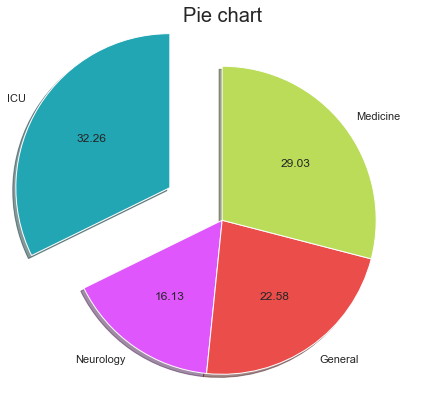

In [ ]:
plt.figure(figsize=(15,6))
service= ["ICU", "Neurology", "General", "Medicine"]
ExpectedLOS=[10,5,7,9]
outside = (0.4, 0, 0, 0) 
colors = ('#22a6b3', '#e056fd', '#eb4d4b', '#badc58')
# Pie Chart
plt.figure(figsize=(15,6))
plt.pie(ExpectedLOS, labels=service, explode=outside, autopct="%.2f", shadow=True, startangle=90,colors=colors) 
plt.title("Pie chart",fontsize=20)
plt.show()



### 12.Connect to sql and write a query to get list of Provider names whose Providername is starting with letter T.

In [ ]:
pip install psycopg2
import psycopg2 as pst
conn = psycopg2.connect("dbname=HospitalDB user=postgres password=postgres")


SyntaxError: invalid syntax (674032390.py, line 1)

### 13.Create a subplot on x = np.arange(0, 10, 0.1) , y = np.sin(np.pi * x) + x with 2 rows & 2 columns with object oriented approach.


<Figure size 1080x432 with 0 Axes>

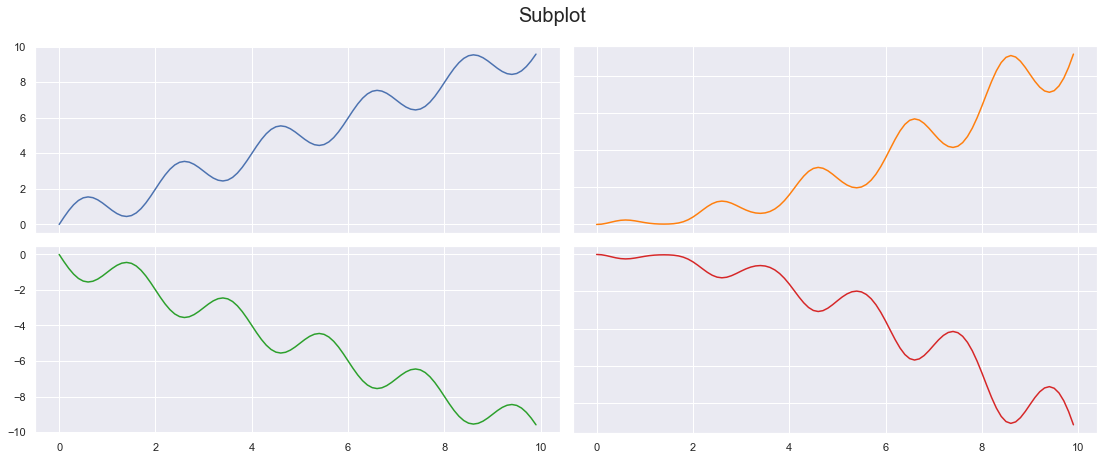

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
x = np.arange(0, 10, 0.1)
y = np.sin(np.pi * x) + x
 
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2)
fig.suptitle('Subplot',fontsize=20)
ax1.plot(x, y)
ax2.plot(x, y**2, 'tab:orange')
ax3.plot(x, -y, 'tab:green')
ax4.plot(x, -y**2, 'tab:red')

for ax in fig.get_axes():
    ax.label_outer()


### 14.Find the number of null values in BloodPressureSystolic column.

In [ ]:
df_amb['BloodPressureSystolic'].isnull().sum()


124

### 15.Replace all the null values in ReadmissionFlag with 0.

In [ ]:
df_re['ReadmissionFlag'].fillna(0,inplace=True)
#df_re['ReadmissionFlag'].isnull().sum()


### 16.Plot a graph to show the distribution of expected length 

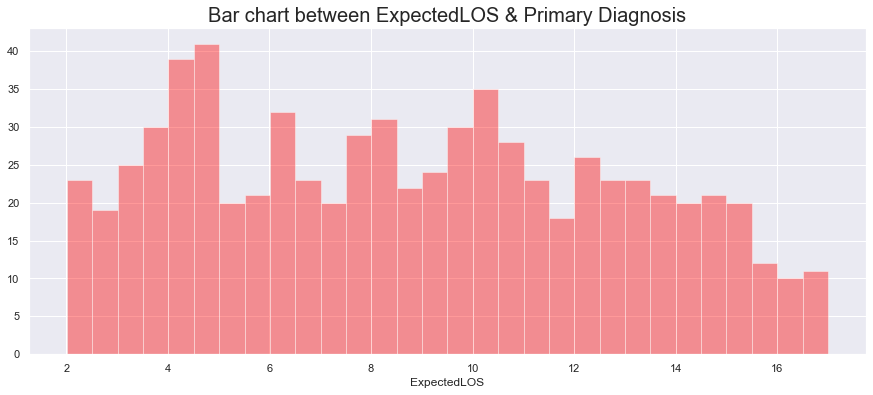

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.distplot(df_re['ExpectedLOS'],kde=False,bins=30, color='red')
plt.title("Bar chart between ExpectedLOS & Primary Diagnosis",fontsize=20)
plt.show()


In [ ]:
EDCorr=df_ED.corr()
EDCorr


,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


### 17.Create a heat map to show the correlation between the column values of Edvisits.

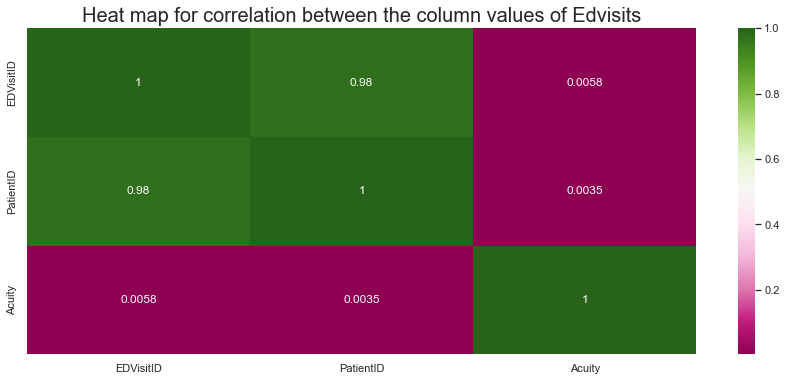

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(EDCorr,annot=True,cmap='PiYG')
plt.title("Heat map for correlation between the column values of Edvisits",fontsize=20)
plt.show()

### 18.Add column 'Age' in Patient table.

In [ ]:
import datetime 
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))

df7=df_pa['DateOfBirth'].apply(lambda x: from_dob_to_age(x))
df7
df_pa['Age']=df7
df_pa


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
0,1,Lanni,Sue,1960-01-01 00:00:00.000,Male,White,English,62
1,2,Far,Myers,1985-11-15 02:08:42.090,Male,White,English,36
2,3,Devlin,Michael,1976-04-15 02:52:09.762,Male,White,English,46
3,4,Carmine,Texas,1968-10-15 03:32:13.635,Male,White,English,53
4,5,Tann,Bama,1962-05-01 19:12:58.950,Male,White,English,60
...,...,...,...,...,...,...,...,...
940,941,Wat,Fideler,1986-05-26 00:01:19.761,Male,Black/African-American,English,36
941,942,Wandie,Baythrop,1970-06-10 21:41:03.814,Male,Black/African-American,English,52
942,943,Diahann,Smeeton,1983-01-08 21:49:27.884,Male,Black/African-American,English,39
943,944,Panchito,Sharple,1963-06-05 07:57:05.569,Male,Black/African-American,English,59


### 19.Create a dataframe with date and time as columns, where the values are the discharge time from readmissionregistry sheet.

In [ ]:
df=pd.DataFrame()
df['Dates'] = pd.to_datetime(df_re['DischargeDate']).dt.date
df['Time'] = pd.to_datetime(df_re['DischargeDate']).dt.time
df

,Dates,Time
0,2018-01-04,19:59:31.391000
1,2018-01-04,21:28:51.898000
2,2018-01-04,22:28:23.672000
3,2018-01-05,05:47:04.933000
4,2018-01-05,14:18:30.029000
...,...,...
715,2018-03-07,21:22:10.061000
716,2018-03-08,02:43:18.749000
717,2018-03-08,09:27:18.377000
718,2018-03-10,06:06:12.068000


### 20.Count of number of patients admitted based on Primary Diagnosis and Service provided.


In [ ]:
df_dis.groupby(['PrimaryDiagnosis','Service'])['PatientID'].count()


PrimaryDiagnosis    Service         
AMI                 Cardiology          40
                    Hospitalist          1
                    ICU                  5
                    Neurology            2
Afib                Cardiology          10
                    ICU                  1
Broken Leg          Cardiology           3
                    General Medicine     3
                    Hospitalist          3
Diabetes            General Medicine    38
                    Hospitalist         26
Fever               General Medicine    13
                    Hospitalist          3
                    ICU                  3
Flu                 Cardiology           2
                    General Medicine    54
                    Hospitalist         19
                    ICU                  3
                    Neurology            2
Heart Failure       Cardiology          39
                    ICU                 33
                    Neurology            6
Hip Fracture     

### 21.Which demographic patients are prone to get stroke.

In [ ]:
result = pd.merge(df_pa,df_dis, how="inner", on=["PatientID"])
##result.groupby (["Race"]).count()
#x=result.where(result["PrimaryDiagnosis"=="Stroke"])
#x
df = result.groupby(["PrimaryDiagnosis"]).filter(lambda x:"PrimaryDiagnosis"=="Stroke")
df

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Converted_dob,Age,AdmissionID,AdmissionDate,DischargeDate,DischargeDisposition,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality


### 22.Create a dataframe with acuity and EDDisposition as the indices and the count of number of patients as the value.

In [ ]:
patientcount=df_ED.groupby(['Acuity','EDDisposition'])['PatientID'].count()
patientcount

Acuity  EDDisposition
1       Admitted          32
        Discharged       558
2       Admitted         116
        Discharged        66
3       Admitted          81
4       Admitted         107
        Discharged        30
5       Admitted         179
        Discharged        30
Name: PatientID, dtype: int64

### 23.write a function to find the center element in the list. (one element in odd length list,  two elements in even length list).


In [ ]:
#initialize variables
ls = []
n=0
m=0
n=int(input('Enter the length of the list:'))#Get length of list from user
for i in range(n):
    e=int(input("Please enter a value for the list:"))#get the values of list
    ls.append(e)
#function to get the center number
def center(input_list):
    if n%2==0:
        print("List",ls)
        print("center num: ",ls[int((n/2)-1)],ls[int(n/2)])
    else:
        m = (n+1)/2 
        print("List",ls)
        print("center num: ",ls[int(m-1)])
center(e)


Enter the length of the list:5
Please enter a value for the list:1
Please enter a value for the list:2
Please enter a value for the list:3
Please enter a value for the list:4
Please enter a value for the list:5
List [1, 2, 3, 4, 5]
center num:  3


### 24.Get the number of patients based on ReasonForVisit and EDDisposition (use stack/unstack functions).

In [ ]:
data = df_ED.groupby(['EDDisposition','ReasonForVisit'],as_index=False)['PatientID'].count()
stack = pd.DataFrame(data)

Stack_pivot =stack.pivot(index='EDDisposition',columns = ['ReasonForVisit'],values='PatientID')
Stack_pivot

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


In [ ]:
stacked = Stack_pivot.stack()
stacked

EDDisposition  ReasonForVisit     
Admitted       Accident                39.0
               Bleeding                16.0
               Car Accident            17.0
               Chest Pain              94.0
               Fever                   46.0
               Gun Shot                16.0
               Migraine                47.0
               Pneumonia              136.0
               Shortness of Breath     72.0
               Stomach Ache            32.0
Discharged     Bleeding                15.0
               Chest Pain              15.0
               Cough                    1.0
               Fever                  188.0
               Intoxication            30.0
               Laceration              30.0
               Migraine               109.0
               Pneumonia               65.0
               Shortness of Breath     77.0
               Stomach Ache           154.0
dtype: float64

In [ ]:
stacked.unstack()

ReasonForVisit,Accident,Bleeding,Car Accident,Chest Pain,Cough,Fever,Gun Shot,Intoxication,Laceration,Migraine,Pneumonia,Shortness of Breath,Stomach Ache
EDDisposition,,,,,,,,,,,,,
Admitted,39.0,16.0,17.0,94.0,NaN,46.0,16.0,NaN,NaN,47.0,136.0,72.0,32.0
Discharged,NaN,15.0,NaN,15.0,1.0,188.0,NaN,30.0,30.0,109.0,65.0,77.0,154.0


### 25.Plot a graph by counting the no. of patients in each department.

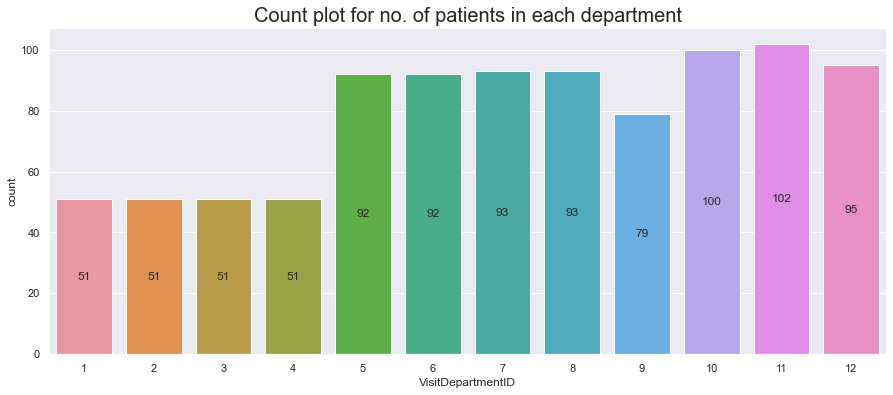

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='VisitDepartmentID',data=df_amb)
ax.bar_label(ax.containers[0], label_type='center')
plt.title("Count plot for no. of patients in each department",fontsize=20)
plt.show()

### 26.Using arrays and loops, find the count of patients based on gender.

In [ ]:
lst=np.array(df_pa[['Gender']])
    
m_count=0
f_count=0
for x in lst:
    
    if x== "Male":
        m_count +=1 
    else :
        f_count +=1
        
print ("Total Male patients:", m_count)

print ("Total Female patients:",f_count)

Total Male patients: 537
Total Female patients: 408


### 27.Plot a graph to count the patients based on discharge disposition.

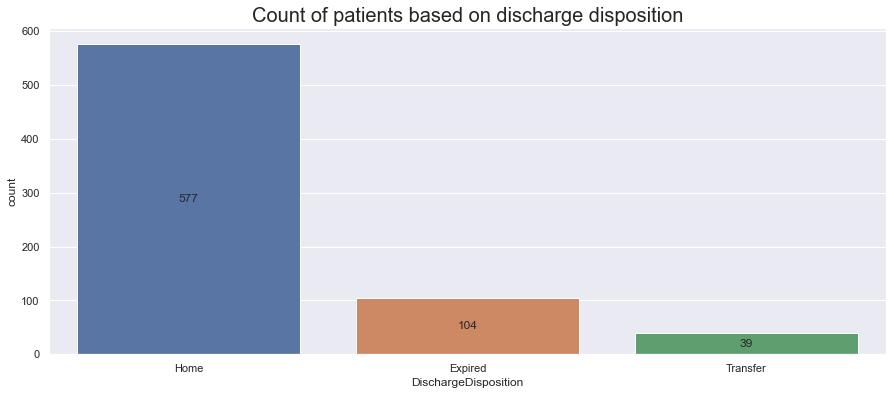

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.countplot(x='DischargeDisposition',data=df_re)
ax.bar_label(ax.containers[0], label_type='center')
plt.title("Count of patients based on discharge disposition",fontsize=20)
plt.show()

### 28.Which reason of visit has maximum mortality rate.

### 29.Calculate average LOS.

In [ ]:
df_dis['ExpectedLOS'].mean()

8.82458915915616

### 30.Which patient id has most entries in readmission registry.

In [ ]:
admn_reg =df_re['PatientID'].value_counts().sort_values(ascending = False)
print('Patient ID having more entries and their counts ' ,admn_reg.head(1))


Patient ID having more entries and their counts  23    3
Name: PatientID, dtype: int64


### 31.Find the count of White Spanish Male.

In [ ]:
count=df_pa['PatientID'][(df_pa['Race']=='White') & (df_pa['Language']=='Spanish') & (df_pa['Gender']=='Male')].count()
print("Total count of White Spanish Male patients are:", 15)



Total count of White Spanish Male patients are: 15


### 32.Write a function to print the multipication table of the given number.

In [ ]:
n= int(input("Enter the number table:"))
m= int(input("Enter the end value of multiplication:"))
print("The Multiplication Table of the above given number ",n)
def mul(num):
    for i in range(m+1):
        x=num*i
        print(num, " X ", i, " = ",x)
    return x
mul(n)


Enter the number table:3
Enter the end value of multiplication:5
The Multiplication Table of the above given number  3
3  X  0  =  0
3  X  1  =  3
3  X  2  =  6
3  X  3  =  9
3  X  4  =  12
3  X  5  =  15


15

### 33.Using a bar chart, which Service had the lowest count of Expected Mortality?


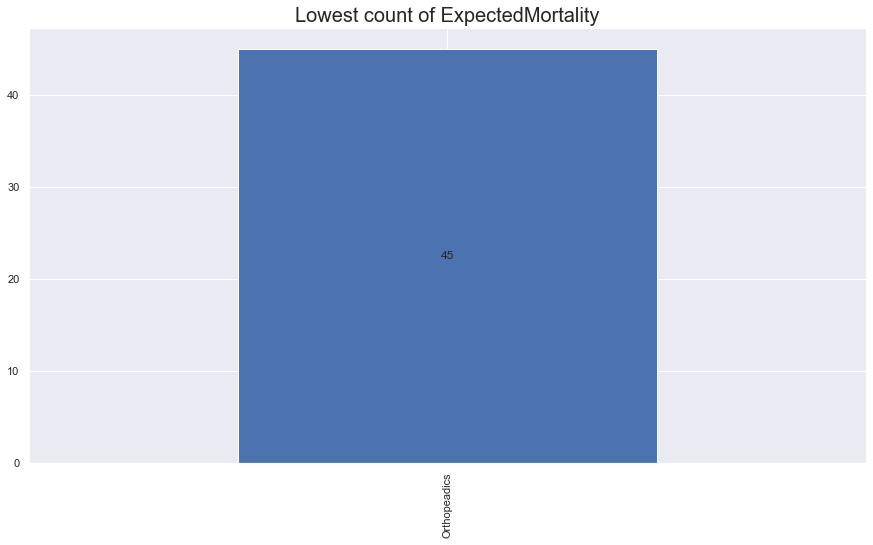

In [ ]:
sns.set(style="darkgrid")
low_count = df_re['Service'].value_counts().tail(1)
ax=low_count.plot(kind='bar',figsize=(15,8))
ax.bar_label(ax.containers[0], label_type='center')
plt.title('Lowest count of ExpectedMortality',fontsize=20)
plt.show()

### 34.np.arange(1,31).reshape(6,5) Find the array slicing to get the elements with values 11,12,16,17.


In [ ]:
arr1=np.arange(start=1, stop=31)
arr2 = np.reshape(arr1,(6,5))

#arr1
arr2
arr=print(arr2[2:4,0:2])

[[11 12]
 [16 17]]


### 35.np.arange(1,31).reshape(6,5), find array slicing for elements 2,8,14,20.


In [ ]:
arr1=np.arange(start=1, stop=31)
arr2 = np.reshape(arr1,(6,5))
arr2
arr = np.diag(arr2, 1)
print(arr)


[ 2  8 14 20]


### 36.Create a correlation matrix on EDVisits.

In [ ]:
EDCorr=df_ED.corr()
EDCorr

,EDVisitID,PatientID,Acuity
EDVisitID,1.000000,0.975477,0.005813
PatientID,0.975477,1.000000,0.003545
Acuity,0.005813,0.003545,1.000000


Text(0.5, 1.0, 'Correlation matrix on EDVisits')

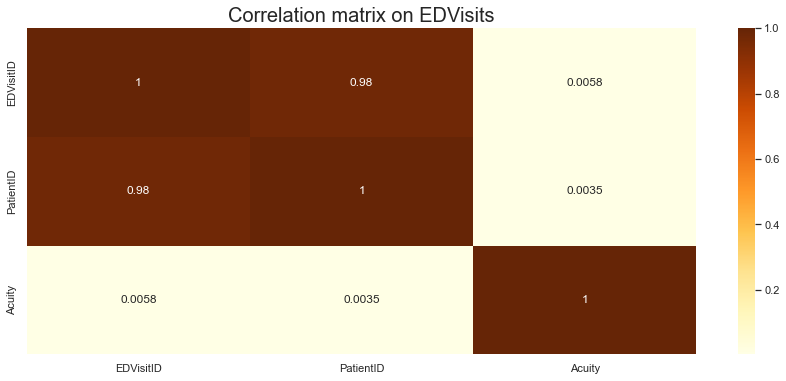

In [ ]:
plt.figure(figsize=(15,6))
sns.heatmap(EDCorr,annot=True,cmap='YlOrBr')
plt.title("Correlation matrix on EDVisits",fontsize=20)

### 37.Write a function to print all the upper case letter of a given sentence.


In [ ]:
string = input('Enter any string: ')

upper = ''
for char in string:
    #check uppercase characters
    if char.isupper():
        upper += char

# print uppercase characters
print('Uppercase characters:', upper)

Enter any string: krishna Is My name
Uppercase characters: IM


### 38.Number of patients on 'Transfer' based on primary diagnosis.


In [ ]:
flt = df_re['DischargeDisposition']=='Transfer'
df_re.loc[flt]['PrimaryDiagnosis'].value_counts()

Stroke              9
Heart Failure       9
Pneumonia           8
Diabetes            7
Flu                 2
Afib                1
Knee Replacement    1
Laceration          1
Pain                1
Name: PrimaryDiagnosis, dtype: int64

### 39.Get the FirstName, LastName, DateOfBirth of the Patients whose reason for visit is Migraine. Use EDUnique Sheet for reason for visit.


In [ ]:
result1 = pd.merge(df_pa,df_EDU, how="inner", on=["PatientID"])
flt = result1['ReasonForVisit']=='Migraine'
result1.loc[flt][['FirstName','LastName','DateOfBirth']]

,FirstName,LastName,DateOfBirth
1,Far,Myers,1985-11-15 02:08:42.090
2,Devlin,Michael,1976-04-15 02:52:09.762
11,Zonnya,Ab,1963-05-23 10:04:33.074
13,Gan,Yu,1970-06-02 06:22:54.675
21,Joesph,Long,1979-12-04 16:45:56.080
...,...,...,...
896,Barrows,Coupland,1979-10-31 18:28:35.483
907,Knox,Group,1975-08-25 22:27:50.177
909,Kuvalis,Coupland,1986-05-23 19:23:27.752
914,Jerrilyn,Dyson,1978-01-18 02:41:55.178


### 40.Plot a graph showing the count of patients for the reason visited the hospital.


In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
ax=sns.countplot(x='ReasonForVisit',data=df_ED)
ax.bar_label(ax.containers[0], label_type='center')
plt.show()

### 41.Find the visit type with maximum 'No Show'.

In [ ]:
df_count = df_amb.groupby('VisitType')['VisitStatus'].apply(lambda x: (x=='No Show').sum()).reset_index(name='count')
df_count.max()

VisitType    Telemedicine
count                  74
dtype: object

### 42.Using loc , get the details of the providers where providerId is between 11 and 20 and ProviderSpecialty is Surgery.


In [ ]:
flt =(df_pro['ProviderID']>=11) & (df_pro['ProviderID']<=20) & (df_pro['ProviderSpecialty']=='Surgery')
x = df_pro.loc[flt]
x

,ProviderID,ProviderName,ProviderSpecialty,ProviderDateOnStaff
10,11,Kim Kimberly,Surgery,1998-05-10 14:47:29.468
11,12,Sarah Ab,Surgery,1998-08-18 05:22:40.762
12,13,Abigail Marriot,Surgery,1998-11-08 12:25:45.705
13,14,Dave Yu,Surgery,1999-06-26 16:18:57.436
14,15,Christian Saint,Surgery,2000-08-27 00:12:40.326
15,16,Perry Pardon,Surgery,2001-02-13 11:49:17.862


### 43.Write a regular expression to find all the digits and numbers in the string.


In [ ]:
import re
str=input("Enter a String with numbers: \n")
#Create a list to hold the numbers
num_list = re.findall(r'\d+', str)
print(num_list)

Enter a String with numbers: 
2 kids
['2']


### 44.Create a pivot table displaying average LOS based on Service and Primary Diagnosis.


In [ ]:
pivot = df_re.pivot_table(index =['Service','PrimaryDiagnosis'], 
                       values =['ExpectedLOS'], 
                       aggfunc ='mean')
print(pivot)

                                     ExpectedLOS
Service          PrimaryDiagnosis               
Cardiology       AMI                   12.414202
                 Afib                  13.162920
                 Broken Leg             3.911826
                 Flu                    3.970428
                 Heart Failure         13.014044
                 Kidney Failure         6.580273
General Medicine Broken Leg             3.368132
                 Diabetes               5.665298
                 Fever                  6.803796
                 Flu                    6.141753
                 Hypertension           5.369365
                 Kidney Failure         5.943163
                 Laceration             6.771154
                 Pneumonia              6.140270
                 Stroke                 7.173333
Hospitalist      AMI                   13.828290
                 Broken Leg             7.125069
                 Diabetes               7.874359
                 Fev

### 45.Calculate mortality by diagnosis.


In [ ]:
df_dis.groupby('PrimaryDiagnosis')['ExpectedMortality'].sum().round(2)


PrimaryDiagnosis
AMI                   11.29
Afib                   3.35
Broken Leg             2.48
Diabetes              18.33
Fever                  5.64
Flu                   21.84
Heart Failure         30.08
Hip Fracture           8.59
Hypertension          14.83
Kidney Failure         4.95
Knee Replacement       6.68
Laceration             7.92
Migraine               6.81
Pain                   3.84
Pneumonia             66.31
Spinal Cord Injury     0.40
Stroke                30.09
Name: ExpectedMortality, dtype: float64

### 46.Write a code to split a sentence into words using regex.


In [ ]:
import regex

s = input("Enter a String : \n")
x = regex.split(r"\s+|\b(?!^|$)", s, flags=regex.VERSION1)

print(x)

Enter a String : 
tirth is my son
['tirth', '', 'is', '', 'my', '', 'son']


### 47.Using indexing , loc to retrieve the row with maximum BloodPressureSystolic.


In [ ]:
m = df_amb['BloodPressureSystolic'].idxmax()
m
df_amb.iloc[m]

VisitID                                          933
PatientMRN                                       884
ProviderID                                        27
DateofVisit                      2019-02-14 00:00:00
DateScheduled             2019-01-22 19:26:49.163000
VisitDepartmentID                                 12
VisitType                               Telemedicine
BloodPressureSystolic                          190.0
BloodPressureDiastolic                    143.989174
Pulse                                      74.976879
VisitStatus                                Completed
Name: 236, dtype: object

### 48.Display the average LOS based on Service and Discharge Disposition(Maintain the column Hierarchy).


In [ ]:
df_re['DischargeDate']=pd.to_datetime(df_re['DischargeDate']).dt.date
df_re['AdmissionDate']=pd.to_datetime(df_re['AdmissionDate']).dt.date

In [ ]:
df_re['LOS'] = df_re['DischargeDate']-df_re['AdmissionDate']
df_re['LOS']

0      3 days
1      3 days
2      3 days
3      4 days
4      4 days
        ...  
715   13 days
716   14 days
717   14 days
718   16 days
719   16 days
Name: LOS, Length: 720, dtype: timedelta64[ns]

In [ ]:
df_re.columns

Index(['AdmissionID', 'PatientID', 'AdmissionDate', 'DischargeDate',
       'DischargeDisposition', 'Service', 'PrimaryDiagnosis', 'ExpectedLOS',
       'ExpectedMortality', 'ReadmissionFlag', 'DaysToReadmission',
       'EDVisitAfterDischargeFlag', 'LOS'],
      dtype='object')

In [ ]:
pivot = df_re.pivot_table(index =['Service','DischargeDisposition'], 
                       values =['LOS'], 
                       aggfunc ='mean')
print(pivot)

                                                            LOS
Service          DischargeDisposition                          
Cardiology       Expired                        8 days 20:48:00
                 Home                          10 days 04:28:48
                 Transfer                      11 days 04:48:00
General Medicine Expired                        8 days 12:00:00
                 Home                 9 days 18:33:00.786026200
                 Transfer                      10 days 16:30:00
Hospitalist      Expired                       10 days 00:00:00
                 Home                 9 days 00:49:05.454545454
                 Transfer                       8 days 16:00:00
ICU              Expired              9 days 06:37:14.482758620
                 Home                 9 days 03:03:16.363636363
                 Transfer                       8 days 20:00:00
Neurology        Expired                       10 days 04:26:40
                 Home                   

### 49.Retrieve the rows where SBP<140 and DBP<80.


In [ ]:
res = df_amb[(df_amb['BloodPressureSystolic']<140) & (df_amb['BloodPressureDiastolic']<80)]
res

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
5,809,894,31,2019-03-13,2019-02-28 10:28:01.091,2,Physical,121.0,57.692485,60.402573,No Show
16,707,859,36,2019-03-16,2019-02-26 17:42:39.779,6,Follow Up,137.0,72.756586,64.071361,No Show
18,503,887,12,2019-01-21,2019-01-07 06:04:17.575,7,Follow Up,131.0,74.163851,97.248671,No Show
19,710,862,1,2019-03-19,2019-03-03 11:39:03.145,9,Telemedicine,127.0,66.406797,94.537837,No Show
23,711,863,1,2019-03-20,2019-03-10 07:34:56.766,10,Telemedicine,124.0,77.303553,77.926874,No Show
...,...,...,...,...,...,...,...,...,...,...,...
909,177,815,32,2019-02-22,2019-02-04 06:53:41.987,9,Follow Up,122.0,67.615828,52.742629,Canceled
929,786,871,34,2019-03-25,2019-02-26 09:48:42.832,3,Telemedicine,122.0,78.210501,53.760978,Canceled
932,394,623,6,2019-02-05,2019-01-10 05:43:34.544,9,Physical,130.0,75.114100,80.951071,Canceled
941,399,638,11,2019-02-10,2019-02-02 20:49:56.868,2,Physical,121.0,64.896818,68.496869,Canceled


### 50.Which departmentID has maximum number of visits scheduled.


In [ ]:
df_max = df_amb.groupby('VisitDepartmentID')['VisitStatus'].apply(lambda x: (x!='Cancelled').sum())#.reset_index(name='count')
print('Visit Department ID with maximum visits is:',df_max.idxmax())

Visit Department ID with maximum visits is: 11


### 51.Display patient details where "ReasonForVisit" is either 'Migraine' or 'Pneumonia' and Acuity is 2 or more.


In [ ]:
res = df_ED[((df_ED['ReasonForVisit']=='Migrane') | (df_ED['ReasonForVisit']=='Pneumonia'))& (df_ED['Acuity']>=2)]
res

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition
11,29,29,2020-01-01 06:51:28.639,2020-01-02 05:57:01.639,2,Pneumonia,Admitted
12,30,30,2020-01-01 07:25:54.177,2020-01-01 23:30:20.151,3,Pneumonia,Admitted
13,31,31,2020-01-01 07:32:51.917,2020-01-01 19:55:46.991,4,Pneumonia,Admitted
14,32,32,2020-01-01 07:58:39.779,2020-01-02 00:47:40.244,2,Pneumonia,Admitted
16,44,44,2020-01-01 11:41:20.981,2020-01-02 05:18:13.677,4,Pneumonia,Admitted
...,...,...,...,...,...,...,...
491,1158,904,2020-01-15 02:06:42.088,2020-01-15 07:04:01.523,4,Pneumonia,Admitted
496,1167,913,2020-01-15 05:09:22.987,2020-01-16 03:57:13.244,4,Pneumonia,Admitted
499,1170,916,2020-01-15 05:57:29.834,2020-01-15 06:03:50.631,4,Pneumonia,Admitted
500,1171,917,2020-01-15 06:27:24.353,2020-01-15 10:16:03.795,2,Pneumonia,Admitted


### 52.Retrieve the row with minimum DBP using sorting technique.


In [ ]:
df_amb.sort_values('BloodPressureDiastolic').head(1)

,VisitID,PatientMRN,ProviderID,DateofVisit,DateScheduled,VisitDepartmentID,VisitType,BloodPressureSystolic,BloodPressureDiastolic,Pulse,VisitStatus
757,163,801,11,2019-02-08,2019-02-07 23:41:12.181,7,Follow Up,120.0,51.695653,53.310495,Completed


### 53.Take the ReasonForVisit from user, find the number of patients admitted with that ReasonForVisit.


In [ ]:
rfv = df_ED['ReasonForVisit'].unique()
print("Reasons of visits of patients:",rfv)
ip = input('Enter the reason for visit:')
if ip in rfv:
    cnt_patients =(df_ED['PatientID'][df_ED['ReasonForVisit']==ip]).count()
    print('Number of patients admitted in the hospital for',ip,'is', cnt_patients)
else:
    print('No patients have been admitted before for the given reason.')


Reasons of visits of patients: ['Stomach Ache' 'Migraine' 'Chest Pain' 'Bleeding' 'Car Accident'
 'Pneumonia' 'Fever' 'Shortness of Breath' 'Gun Shot' 'Accident'
 'Laceration' 'Intoxication' 'Cough']
Enter the reason for visit:Accident
Number of patients admitted in the hospital for Accident is 39


### 54.Mortality O.E.

### 55.Create a bar chart on service & expected length of stay.


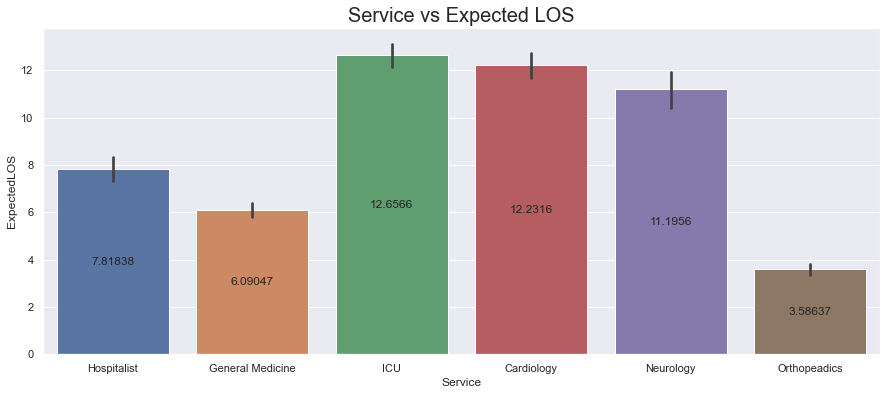

In [ ]:
plt.figure(figsize=(15,6))
ax=sns.barplot(data = df_re,x='Service',y='ExpectedLOS')
ax.bar_label(ax.containers[0], label_type='center')
plt.title('Service vs Expected LOS',fontsize=20)
plt.show()

### 56.Count of canceled status.

In [ ]:
xcnt=df_amb['VisitStatus'][df_amb['VisitStatus']=='Canceled'].count()
print('Total cancelled visits are:',xcnt)

Total cancelled visits are: 60


### 57.Find the age prone to get stroke.


In [ ]:
#Age is calculated in question 18 so make sure to run that first.
result = pd.merge(df_pa,df_re, how="inner", on=["PatientID"])
filter1=result['PrimaryDiagnosis']=='Stroke'
age_grp=result.groupby('Age')['PatientID'].count()
age_grp.sort_values(ascending=False)

Age
37    35
46    34
51    33
60    32
58    32
41    31
45    30
50    29
61    29
47    29
49    28
57    28
44    28
62    27
53    26
39    26
48    24
43    24
54    24
40    23
56    22
59    22
42    21
38    20
55    19
36    18
52    15
35    11
Name: PatientID, dtype: int64

### 58.Display total count of patients service wise based on gender.


In [ ]:
pat = df_pa.filter(['Patient_ID','Gender'],axis=1)
result = pd.merge(df_pa,df_re, how="inner", on=["PatientID"])
pivot = result.pivot_table(index =['Service','Gender'], 
                       values =['PatientID'], 
                       aggfunc ='count')
print(pivot)


                         PatientID
Service          Gender           
Cardiology       Female         41
                 Male           54
General Medicine Female        114
                 Male          149
Hospitalist      Female         35
                 Male           66
ICU              Female         65
                 Male           86
Neurology        Female         34
                 Male           31
Orthopeadics     Female         22
                 Male           23


### 59.Create a dataframe by splitting provider name to firstname and lastname with names for the columns.


In [ ]:
df_name =pd.DataFrame(df_pro.ProviderName.str.split(' ',1).tolist(),
                         columns = ['First_Name','Last_Name'])
print(df_name)


   First_Name Last_Name
0       Sally       Sue
1        Mike     Myers
2      Jordan   Michael
3         Ted     Texas
4         Ala      Bama
5       Harry      Kane
6       Barry       Bar
7         Ted     Green
8         Ted     Black
9        Fred       Man
10        Kim  Kimberly
11      Sarah        Ab
12    Abigail   Marriot
13       Dave        Yu
14  Christian     Saint
15      Perry    Pardon
16       Kent   Kendall
17       Ryan     Kevin
18      Tyler    Conner
19     Bailey    Barret
20      Megan     Bonco
21     Joesph    Walter
22     Walter      King
23       Luke      Long
24     Justin      Time
25       Mike    Joseph
26    Bridget    Brenda
27     Brenda      Bing
28   Chandler      Bing
29     Joesph      Ross
30     Dwight     Scott
31    Michael   Halpert
32     Pamela      Ding
33       Tony     Creed
34    Phyllis   Stanley
35      Holly       Hue
36      Trent       Tye
37   Kimberly      Cone
38      Harry      West
39      Rosie    Renter


### 60.Find the list of patients whose ExpectedLOS is greater than the value given by the user.


In [ ]:
value = int(input("Enter a value :"))
cnt_patients = (df_dis['PatientID'][df_dis['ExpectedLOS']>value]).count()

if (cnt_patients> 0 ) :
    print("Number of patients having higher LOS than",value,"is",cnt_patients)
else:
    print("There are no patients above the given Expected LOS ")


Enter a value :6
Number of patients having higher LOS than 6 is 502


### 61.Plot a graph by multiplotting on the same canvas  (Take any set of x & y values).


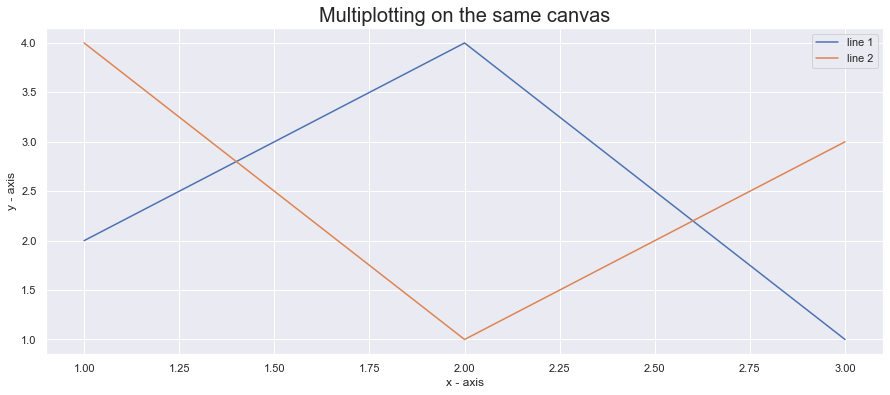

In [ ]:
# line 1 points
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
x1 = [1,2,3]
y1 = [2,4,1]
# plotting the line 1 points 
plt.plot(x1, y1, label = "line 1")  
# line 2 points
x2 = [1,2,3]
y2 = [4,1,3]
# plotting the line 2 points 
plt.plot(x2, y2, label = "line 2")  
# naming the x axis
plt.xlabel('x - axis')
# naming the y axis
plt.ylabel('y - axis')
# giving a title to my graph
plt.title('Multiplotting on the same canvas',fontsize=20) 
# show a legend on the plot
plt.legend()  
# function to show the plot
plt.show()




### 62.Display the data for all 'White Female' patients above the age of 50.


In [ ]:
import datetime
def from_dob_to_age(born):
    today = datetime.date.today()
    return today.year - born.year - ((today.month, today.day) < (born.month, born.day))
df_age=df_pa['DateOfBirth'].apply(lambda x: from_dob_to_age(x))
df_age
df_pa['Age']=df_age
df_pa
df_age=display(df_pa[(df_pa["Gender"]=="Female") &  (df_pa["Race"] == "White")  & (df_pa["Age"] > 50)])
df_age

,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age
28,29,Ted,Scott,1967-12-09 05:01:37.892,Female,White,Spanish,54
30,31,Harry,Ding,1960-10-08 01:42:51.212,Female,White,Spanish,61
33,34,Ted,Hue,1960-11-28 18:05:11.459,Female,White,Spanish,61
34,35,Fred,Tye,1966-04-14 06:01:07.169,Female,White,Spanish,56
42,43,Ryan,Angear,1971-09-14 05:59:22.112,Female,White,Spanish,51
...,...,...,...,...,...,...,...,...
864,865,Giovanni,Borland,1960-12-01 13:16:18.100,Female,White,English,61
865,866,Jermayne,Lowndes,1970-12-09 04:49:48.933,Female,White,English,51
866,867,Gail,Inc,1967-03-10 08:18:47.908,Female,White,English,55
867,868,Des,Heindrick,1969-08-15 11:05:30.165,Female,White,English,53


### 63.Using loc, retrieve the firstname and lastname of patients between indices 101 and 200.


In [ ]:
df_pa.iloc[101:201,[1,2]]


,FirstName,LastName
101,Gipsy,Frankton
102,Jethro,Wharin
103,Viv,Aylward
104,Swift,Dreschler
105,Fadel,Jacquemard
...,...,...
196,Noam,Laguerre
197,Arie,Bayless
198,Janaye,O'Mohun
199,Fonz,Group


### 64."Using numpy functions, multiply the following arrays


In [ ]:
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
a=np.arange(6).reshape(2,3)
b=np.arange(6).reshape(3,2)
print("Matrix a is:\n",a)
print("Matrix b is:\n",b)
c = np.dot(a,b)
print("Matrix multiplication of matrix A and B is:\n",c)


Matrix a is:
 [[0 1 2]
 [3 4 5]]
Matrix b is:
 [[0 1]
 [2 3]
 [4 5]]
Matrix multiplication of matrix A and B is:
 [[10 13]
 [28 40]]


### 65.Get the  number of patients based on service and primary diagnosis.


In [ ]:
df_re.groupby(["Service", "PrimaryDiagnosis"])["PatientID"].count()


Service           PrimaryDiagnosis  
Cardiology        AMI                   40
                  Afib                  10
                  Broken Leg             3
                  Flu                    2
                  Heart Failure         39
                  Kidney Failure         1
General Medicine  Broken Leg             3
                  Diabetes              38
                  Fever                 13
                  Flu                   54
                  Hypertension          35
                  Kidney Failure        12
                  Laceration            21
                  Pneumonia             67
                  Stroke                20
Hospitalist       AMI                    1
                  Broken Leg             3
                  Diabetes              26
                  Fever                  3
                  Flu                   19
                  Hypertension           6
                  Kidney Failure         6
                 

### 66.np.arange(1,31).reshape(6,5), find array slicing to get the elements 4,5,24,25,29,30.


In [ ]:
arr1=np.arange(start=1, stop=31)
arr2 = np.reshape(arr1,(6,5))
arr2
print(arr2[[0,0,4,4,5,5],[3,4,3,4,3,4]])

[ 4  5 24 25 29 30]


### 67.Make a pivot table by the no. of patients from the admission date till discharge date.

### 68.Display the data where actual LOS is greater than expected LOS.


In [ ]:
df_re.loc[(df_re['LOS'] > df_re['ExpectedLOS'])]

TypeError: Invalid comparison between dtype=timedelta64[ns] and ndarray

### 69.Details of the patients whose firstname or lastname contains string "lau" , should be case insensitive.


In [ ]:
df_pa['flag'] = df_pa['LastName'].str.contains('lau',case=False)| df_pa['FirstName'].str.contains('lau',case=False)
display(df_pa[(df_pa['flag']==True)])


,PatientID,FirstName,LastName,DateOfBirth,Gender,Race,Language,Age,flag
282,283,Lauren,Gaskal,1962-05-08 01:54:00.111,Female,Black/African-American,English,60,True
322,323,Lauren,Foort,1960-06-23 20:07:53.045,Female,White,English,62,True
369,370,Zulauf,Ellingham,1982-12-17 16:27:56.391,Female,White,English,39,True
382,383,Zulauf,LLC,1969-03-16 07:48:49.338,Female,White,English,53,True
454,455,Zulauf,Alvar,1961-10-02 08:24:17.334,Female,White,English,60,True
463,464,Zulauf,Manske,1965-06-22 02:49:28.667,Female,White,English,57,True
818,819,Zulauf,Bitcheno,1967-04-02 07:17:53.635,Female,White,English,55,True
830,831,Zulauf,O'Shavlan,1970-05-17 08:09:28.988,Female,White,English,52,True
850,851,Lemmy,Klausen,1973-06-18 06:19:43.475,Female,White,English,49,True
906,907,Jerrilyn,Klausen,1979-09-04 13:05:57.870,Male,Black/African-American,English,43,True


### 70.Plot a graph to show the distribution of expected mortality.


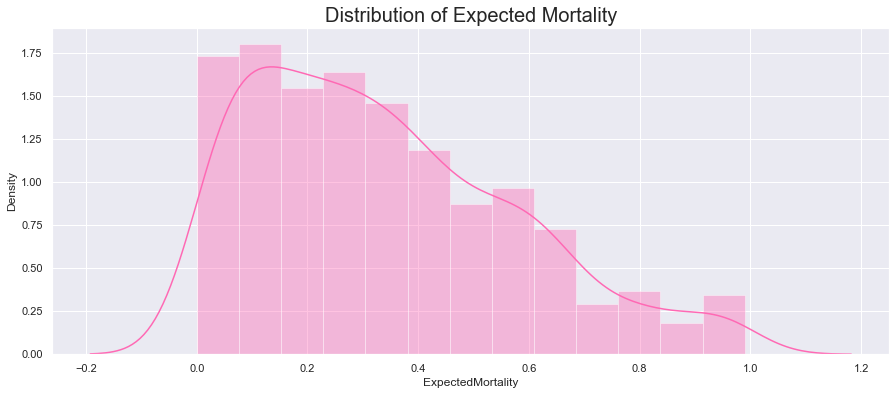

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
sns.distplot(df_re['ExpectedMortality'],color='hotpink')
plt.title("Distribution of Expected Mortality",fontsize=20)
plt.show()

### 71.Create a visualization on the count of patients based on primary diagnosis.


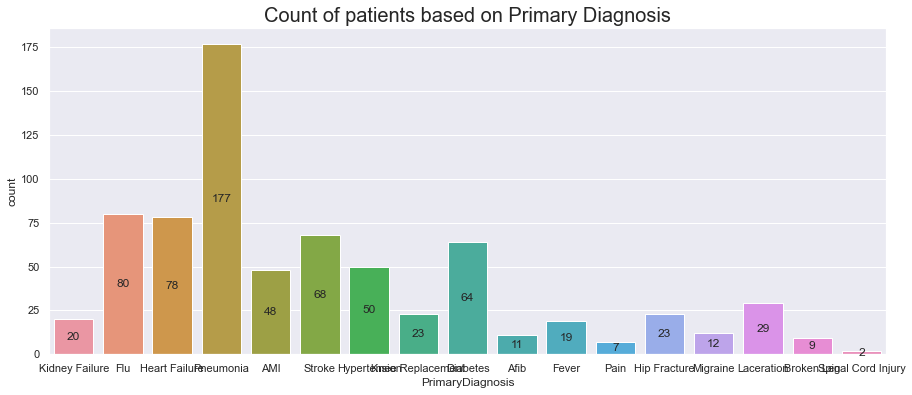

In [ ]:
plt.figure(figsize=(15,6))
sns.set(style="darkgrid")
ax=sns.countplot(x='PrimaryDiagnosis',data=df_re)
ax.bar_label(ax.containers[0], label_type='center')
plt.title("Count of patients based on Primary Diagnosis",fontsize=20)
plt.show()

### 72.List male patients over the age of 60 who have undergone surgery from January-March 2019.


In [ ]:

result1 = pd.merge(df_amb,df_pro, how="left", on=["ProviderID"])

flt1=(result1['VisitStatus']=='Completed') &  (result1['DateofVisit']>='2019-01-01') & (result1['DateofVisit']<='2019-03-31') & (result1['ProviderSpecialty'] == 'Surgery')
result2=result1.loc[flt1]
result3 = pd.merge(result2,df_pa, how="inner", left_on="PatientMRN",right_on="PatientID")
result3.loc[(result3['Gender']=='Male') & (result3['Age']>60)][['FirstName','LastName']]

,FirstName,LastName
41,Constanta,Edgin
61,Daugherty,Conner
73,Berta,Loxly


### 73.Delete the column 'DischargeDispostion' iteratively.


In [ ]:
#x=len(df_re['DischargeDisposition'])
for i in df_re.columns:
    if 'DischargeDisposition' in i :
        del df_re[i]
        
df_re.head() 

,AdmissionID,PatientID,AdmissionDate,DischargeDate,Service,PrimaryDiagnosis,ExpectedLOS,ExpectedMortality,ReadmissionFlag,DaysToReadmission,EDVisitAfterDischargeFlag,LOS
0,389,1,2018-01-01,2018-01-04,Hospitalist,Kidney Failure,6.717771,0.010046,NaN,NaN,NaN,3 days
1,635,2,2018-01-01,2018-01-04,General Medicine,Flu,3.825969,0.604562,1.0,2.0,1.0,3 days
2,606,3,2018-01-01,2018-01-04,General Medicine,Flu,3.382493,0.266137,1.0,3.0,1.0,3 days
3,587,5,2018-01-01,2018-01-05,General Medicine,Flu,3.763352,0.307527,1.0,4.0,1.0,4 days
4,640,6,2018-01-01,2018-01-05,ICU,Heart Failure,13.650953,0.408898,NaN,NaN,NaN,4 days


### 74.Get the list of ReasonForVisit.


In [ ]:
rfv = df_ED['ReasonForVisit'].unique().tolist()
print(sorted(rfv))

['Accident', 'Bleeding', 'Car Accident', 'Chest Pain', 'Cough', 'Fever', 'Gun Shot', 'Intoxication', 'Laceration', 'Migraine', 'Pneumonia', 'Shortness of Breath', 'Stomach Ache']


### 75.Calculate the time spent in ED Department for each visit.


In [ ]:
df_EDU['TimeSpent'] = df_EDU['EDDischargeTime']-df_EDU['VisitDate']
df_EDU['TimeSpent'] = df_EDU['TimeSpent'].astype('timedelta64[h]')
df_EDU

,EDVisitID,PatientID,VisitDate,EDDischargeTime,Acuity,ReasonForVisit,EDDisposition,TimeSpent
0,1,1,2020-01-01 00:00:00.000,2020-01-01 11:20:22.924,1,Stomach Ache,Admitted,11.0
1,12,12,2020-01-01 02:45:40.302,2020-01-02 02:00:00.517,2,Migraine,Admitted,23.0
2,13,13,2020-01-01 03:09:24.701,2020-01-01 05:00:20.852,3,Stomach Ache,Admitted,1.0
3,14,14,2020-01-01 03:12:19.349,2020-01-01 04:32:29.142,3,Migraine,Admitted,1.0
4,15,15,2020-01-01 03:46:32.698,2020-01-01 06:24:52.741,3,Chest Pain,Admitted,2.0
...,...,...,...,...,...,...,...,...
940,1183,929,2020-01-15 10:38:42.570,2020-01-16 02:31:52.023,4,Chest Pain,discharged,15.0
941,1186,932,2020-01-15 11:52:37.540,2020-01-16 10:19:41.570,1,Pneumonia,discharged,22.0
942,1187,933,2020-01-15 12:11:11.678,2020-01-15 16:41:15.223,1,Pneumonia,discharged,4.0
943,1188,934,2020-01-15 12:21:46.006,2020-01-15 18:32:21.060,1,Pneumonia,discharged,6.0


### 76.Reverse the string without using inbuilt functions.


In [ ]:
def findReverse(string):  #function
    reverse = ''
    for i in range(len(string), 0, -1):
        reverse += string[i-1]
    return reverse

# take inputs
string = input('Enter the string: ')

# calling function and display result
reverse = findReverse(string)
print('The reverse string is', reverse)

Enter the string: python
The reverse string is nohtyp


### 77.Create a bar chart by making list on Acuity & EDDisposition column (with no duplicates) & make the hatchs onto the bar by using set_hatch() method.


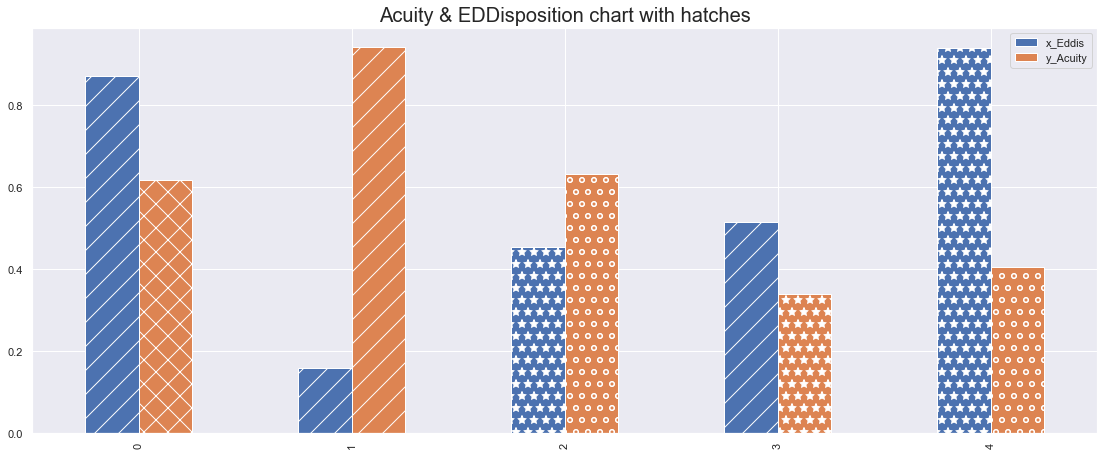

In [ ]:
df_ED['EDDisposition'].min()

df_ED['EDDisposition'].max()

x_Eddis = df_ED['EDDisposition'].unique().tolist()

y_Acuity = df_ED["Acuity"].unique().tolist()

plt.rcParams["figure.figsize"] = [15.50, 6.50]
plt.rcParams["figure.autolayout"] = True

df = pd.DataFrame(np.random.rand(5, 2), columns=['x_Eddis', 'y_Acuity'])
ax = plt.figure().add_subplot(111)
bars = df.plot(ax=ax, kind='bar')
hatches = ["*", "/", "o", "x"]

for patch in bars.patches:
   patch.set_hatch(hatches[np.random.randint(10)%len(hatches)])
plt.title("Acuity & EDDisposition chart with hatches",fontsize=20)
plt.show()

### 78.Find reasonForVisit with highest count of acuity 5 patients.


In [ ]:
df1= df_ED[df_ED['Acuity']==5]
rfv=df1.groupby('ReasonForVisit')['PatientID'].count()
rfv.sort_values(ascending = False).head(1)

ReasonForVisit
Chest Pain    61
Name: PatientID, dtype: int64

### 79.Which PrimaryDiagnosis has the biggest difference between maximum and minimum Expected LOS?


In [ ]:
pri_dg = df_re['PrimaryDiagnosis'].unique()
min_LOS= df_re.groupby('PrimaryDiagnosis')['ExpectedLOS'].min()
max_LOS= df_re.groupby('PrimaryDiagnosis')['ExpectedLOS'].max()
diff=max_LOS-min_LOS
diff.sort_values(ascending=False).head(1)

PrimaryDiagnosis
Pneumonia    14.83426
Name: ExpectedLOS, dtype: float64

### 80.Write a code snippet to print different ProviderSpecialty ( use groupby and get the list of the groups).


In [ ]:
rfv=df_pro.groupby('ProviderSpecialty').agg(list)
display(rfv)

,ProviderID,ProviderName,ProviderDateOnStaff
ProviderSpecialty,,,
Cardiology,"[17, 18, 19, 20, 21, 22, 23, 24]","[Kent Kendall, Ryan Kevin, Tyler Conner, Baile...","[2001-12-22 11:18:32.919000, 2003-01-14 21:16:..."
Pediatrics,"[1, 2, 3, 4, 5, 6, 7, 8, 9]","[Sally Sue, Mike Myers, Jordan Michael, Ted Te...","[1993-01-01 00:00:00, 1993-05-02 00:00:17.6950..."
PrimaryCare,"[25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 3...","[Justin Time, Mike Joseph, Bridget Brenda, Bre...","[2006-06-21 04:46:36.838000, 2006-12-29 16:26:..."
Surgery,"[10, 11, 12, 13, 14, 15, 16]","[Fred Man, Kim Kimberly, Sarah Ab, Abigail Mar...","[1998-03-17 01:47:18.794000, 1998-05-10 14:47:..."
